In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
covid = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
vaccine = pd.read_csv('../input/covid19-in-india/covid_vaccine_statewise.csv')
testing = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')

In [4]:
covid

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [5]:
covid_new = covid.groupby(['State/UnionTerritory'])['Cured','Deaths','Confirmed'].sum().reset_index()

In [6]:
covid_new.head(10)

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,1848286,27136,1938498
1,Andhra Pradesh,370426530,2939367,392432753
2,Arunachal Pradesh,6588149,26799,7176907
3,Assam,92678680,638323,99837011
4,Bihar,125122902,1093466,132231166
5,Bihar****,1402468,18881,1430909
6,Cases being reassigned to states,0,0,345565
7,Chandigarh,10117035,147694,10858627
8,Chhattisgarh,151609364,2063920,163776262
9,Dadra and Nagar Haveli,20352,8,20722


In [7]:
fig = px.scatter_3d(covid_new,x='Confirmed',y='Deaths',z='Cured',color='State/UnionTerritory')
fig.show()

In [8]:
covid_next = covid[['State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational']]
covid_next

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
0,Kerala,1,0
1,Kerala,1,0
2,Kerala,2,0
3,Kerala,3,0
4,Kerala,3,0
...,...,...,...
18105,Telangana,-,-
18106,Tripura,-,-
18107,Uttarakhand,-,-
18108,Uttar Pradesh,-,-


In [9]:
covid_next.isnull().sum()

State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
dtype: int64

In [10]:
covid_next.dtypes

State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
dtype: object

In [11]:
covid_next['ConfirmedIndianNational'] = covid_next['ConfirmedIndianNational'].replace('-',0)
covid_next['ConfirmedForeignNational'] = covid_next['ConfirmedForeignNational'].replace('-',0)
covid_next['ConfirmedIndianNational']=covid_next['ConfirmedIndianNational'].astype('int64')
covid_next['ConfirmedForeignNational']=covid_next['ConfirmedForeignNational'].astype('int64')
covid_next.dtypes

State/UnionTerritory        object
ConfirmedIndianNational      int64
ConfirmedForeignNational     int64
dtype: object

In [12]:
covid_sort = covid_next.groupby(['State/UnionTerritory'])['ConfirmedIndianNational','ConfirmedForeignNational'].sum().reset_index()

In [13]:
covid_sort.head(10)

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
0,Andaman and Nicobar Islands,8,0
1,Andhra Pradesh,81,0
2,Arunachal Pradesh,0,0
3,Assam,0,0
4,Bihar,32,0
5,Bihar****,0,0
6,Cases being reassigned to states,0,0
7,Chandigarh,50,0
8,Chhattisgarh,25,0
9,Dadra and Nagar Haveli,0,0


In [14]:
covid_sort_confirmed = covid_sort.sort_values(by='ConfirmedIndianNational',ascending=False).reset_index(drop=True)
covid_sort_confirmed.head(10)

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
0,Maharashtra,1111,36
1,Kerala,1091,69
2,Uttar Pradesh,462,17
3,Karnataka,405,0
4,Delhi,352,11
5,Rajasthan,296,135
6,Gujarat,256,5
7,Telengana,246,97
8,Punjab,231,0
9,Ladakh,162,0


In [15]:
import seaborn as sns

<AxesSubplot:xlabel='State/UnionTerritory', ylabel='ConfirmedIndianNational'>

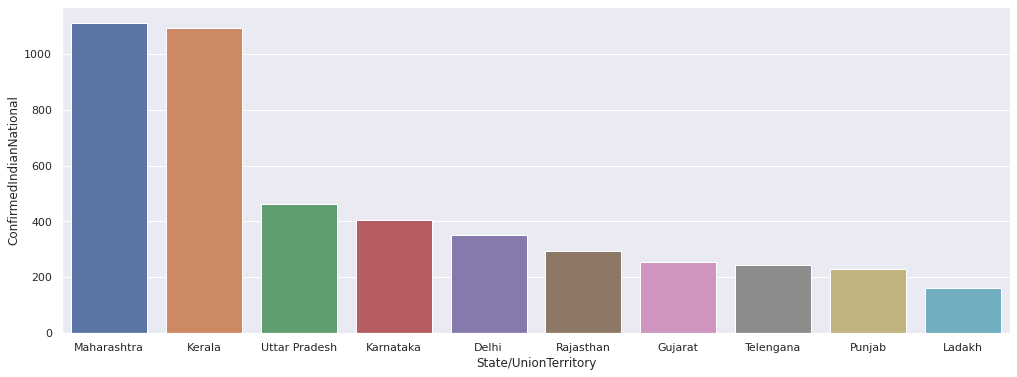

In [16]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='State/UnionTerritory',y='ConfirmedIndianNational',data=covid_sort_confirmed[:10])

<AxesSubplot:xlabel='State/UnionTerritory', ylabel='ConfirmedForeignNational'>

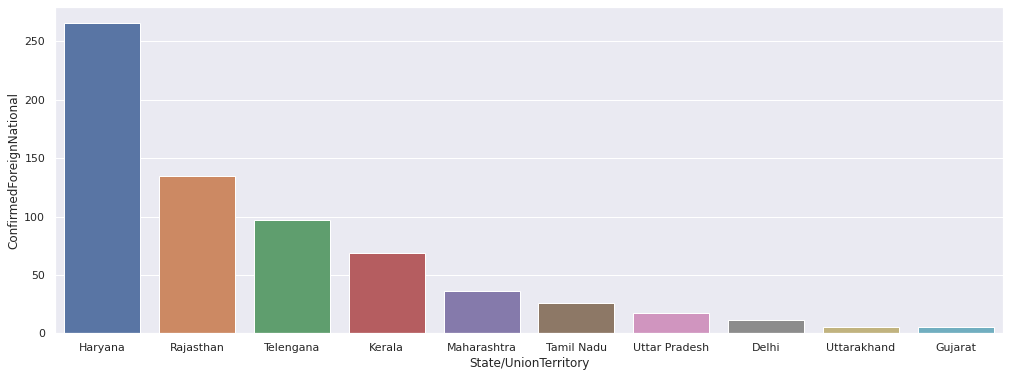

In [17]:
covid_sort_foreign = covid_sort.sort_values(by='ConfirmedForeignNational',ascending=False).reset_index(drop=True)
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='State/UnionTerritory',y='ConfirmedForeignNational',data=covid_sort_foreign[:10])

<AxesSubplot:>

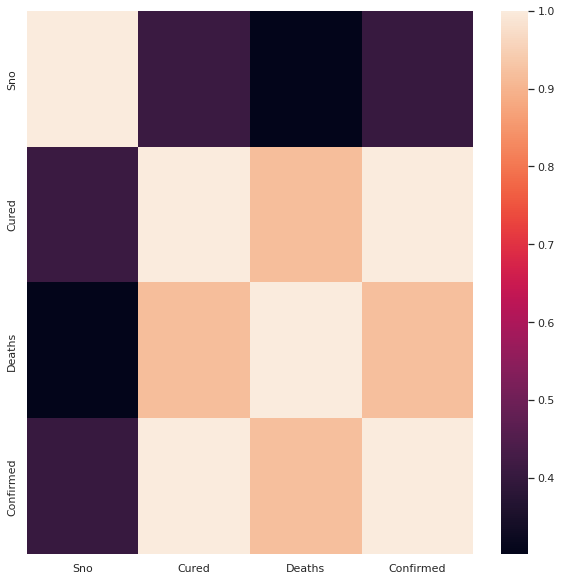

In [18]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data=covid.corr())

In [19]:
covid = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')

In [20]:
covid

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [21]:
covid.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [22]:
covid['DateTime'] = covid['Date']+'     '+covid['Time']

In [23]:
covid.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,DateTime
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020-01-30 6:00 PM
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020-01-31 6:00 PM
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020-02-01 6:00 PM
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020-02-02 6:00 PM
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020-02-03 6:00 PM
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3,2020-02-04 6:00 PM
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3,2020-02-05 6:00 PM
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3,2020-02-06 6:00 PM
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3,2020-02-07 6:00 PM
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3,2020-02-08 6:00 PM


In [24]:
covid_time = covid.groupby(['DateTime'])['Cured','Deaths','Confirmed'].sum().reset_index()
covid_time

,DateTime,Cured,Deaths,Confirmed
0,2020-01-30 6:00 PM,0,0,1
1,2020-01-31 6:00 PM,0,0,1
2,2020-02-01 6:00 PM,0,0,2
3,2020-02-02 6:00 PM,0,0,3
4,2020-02-03 6:00 PM,0,0,3
...,...,...,...,...
555,2021-08-07 8:00 AM,31055861,427371,31895385
556,2021-08-08 8:00 AM,31099771,427862,31934455
557,2021-08-09 8:00 AM,31139457,428309,31969954
558,2021-08-10 8:00 AM,31180968,428682,31998158


In [25]:
covid_time.dtypes

DateTime     object
Cured         int64
Deaths        int64
Confirmed     int64
dtype: object

In [26]:
covid_time['DateTime'] = pd.to_datetime(covid_time['DateTime'])

In [27]:
covid_time.head(10)

,DateTime,Cured,Deaths,Confirmed
0,2020-01-30 18:00:00,0,0,1
1,2020-01-31 18:00:00,0,0,1
2,2020-02-01 18:00:00,0,0,2
3,2020-02-02 18:00:00,0,0,3
4,2020-02-03 18:00:00,0,0,3
5,2020-02-04 18:00:00,0,0,3
6,2020-02-05 18:00:00,0,0,3
7,2020-02-06 18:00:00,0,0,3
8,2020-02-07 18:00:00,0,0,3
9,2020-02-08 18:00:00,0,0,3


<AxesSubplot:xlabel='DateTime', ylabel='Confirmed'>

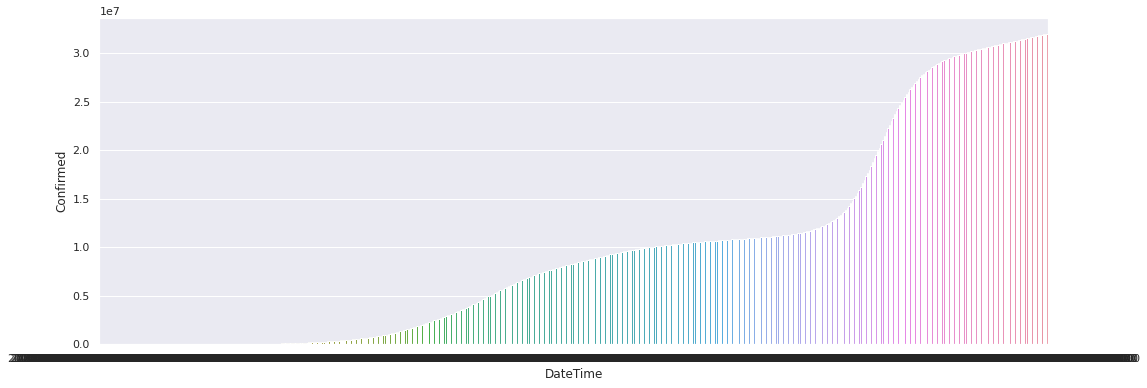

In [28]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='DateTime',y='Confirmed',data=covid_time)

<AxesSubplot:xlabel='DateTime', ylabel='Deaths'>

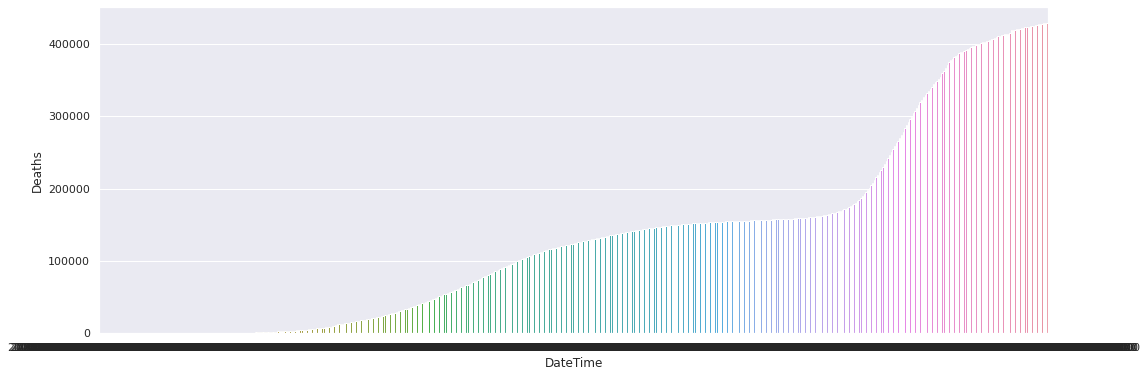

In [29]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='DateTime',y='Deaths',data=covid_time)

<AxesSubplot:xlabel='DateTime', ylabel='Cured'>

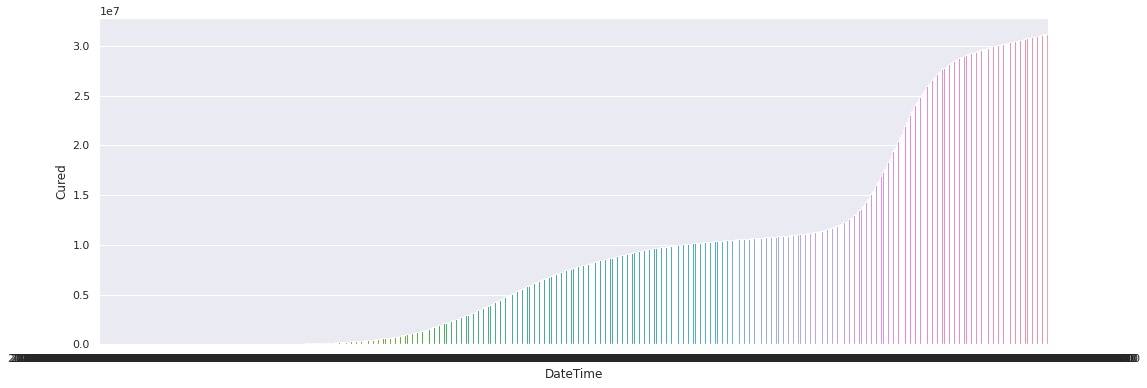

In [30]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='DateTime',y='Cured',data=covid_time)

<AxesSubplot:>

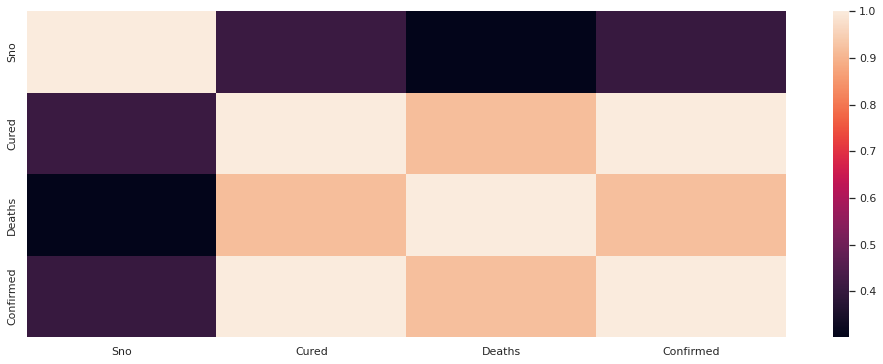

In [31]:
sns.set(rc={'figure.figsize':(17,6)})
sns.heatmap(data=covid.corr())

In [32]:
from fbprophet import Prophet

In [33]:
fb=Prophet()

In [34]:
covid_time.rename(columns={'DateTime':'ds','Cured':'y'}, inplace=True)

In [35]:
covid_time.head(10)

,ds,y,Deaths,Confirmed
0,2020-01-30 18:00:00,0,0,1
1,2020-01-31 18:00:00,0,0,1
2,2020-02-01 18:00:00,0,0,2
3,2020-02-02 18:00:00,0,0,3
4,2020-02-03 18:00:00,0,0,3
5,2020-02-04 18:00:00,0,0,3
6,2020-02-05 18:00:00,0,0,3
7,2020-02-06 18:00:00,0,0,3
8,2020-02-07 18:00:00,0,0,3
9,2020-02-08 18:00:00,0,0,3


In [36]:
model = fb.fit(covid_time)

Initial log joint probability = -18.8827
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1478.9     0.0385517       945.976        1.87       0.187      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       1490.47    0.00194704       254.226   1.917e-05       0.001      190  LS failed, Hessian reset 
     199       1499.76    0.00216027       226.799           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1509.52     0.0014869       91.7693           1           1      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1513.29    0.00705278       478.675      0.6291      0.6291      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1518.33    0.00121955    

In [37]:
future = model.make_future_dataframe(periods=365)

In [38]:
future.tail()

,ds
920,2022-08-07 08:00:00
921,2022-08-08 08:00:00
922,2022-08-09 08:00:00
923,2022-08-10 08:00:00
924,2022-08-11 08:00:00


In [39]:
pred = model.predict(future)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30 18:00:00,-1.006892e+06,-1.789581e+06,9.414519e+05,-1.006892e+06,-1.006892e+06,659737.757055,659737.757055,659737.757055,633062.651356,633062.651356,633062.651356,26675.105699,26675.105699,26675.105699,0.0,0.0,0.0,-3.471539e+05
1,2020-01-31 18:00:00,-9.952869e+05,-1.668346e+06,1.062333e+06,-9.952869e+05,-9.952869e+05,643328.543652,643328.543652,643328.543652,633062.651367,633062.651367,633062.651367,10265.892285,10265.892285,10265.892285,0.0,0.0,0.0,-3.519584e+05
2,2020-02-01 18:00:00,-9.836822e+05,-1.732210e+06,1.071918e+06,-9.836822e+05,-9.836822e+05,639893.699667,639893.699667,639893.699667,633062.651347,633062.651347,633062.651347,6831.048320,6831.048320,6831.048320,0.0,0.0,0.0,-3.437885e+05
3,2020-02-02 18:00:00,-9.720774e+05,-1.664828e+06,9.449074e+05,-9.720774e+05,-9.720774e+05,626165.962442,626165.962442,626165.962442,633062.651370,633062.651370,633062.651370,-6896.688928,-6896.688928,-6896.688928,0.0,0.0,0.0,-3.459114e+05
4,2020-02-03 18:00:00,-9.604726e+05,-1.752725e+06,9.977528e+05,-9.604726e+05,-9.604726e+05,622910.540485,622910.540485,622910.540485,633062.651350,633062.651350,633062.651350,-10152.110865,-10152.110865,-10152.110865,0.0,0.0,0.0,-3.375621e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,2022-08-07 08:00:00,9.764188e+07,8.129355e+07,1.120297e+08,8.158138e+07,1.122748e+08,-344066.311059,-344066.311059,-344066.311059,-343119.786553,-343119.786553,-343119.786553,-946.524506,-946.524506,-946.524506,0.0,0.0,0.0,9.729781e+07
921,2022-08-08 08:00:00,9.781426e+07,8.160685e+07,1.123003e+08,8.169884e+07,1.124992e+08,-352362.704863,-352362.704863,-352362.704863,-343119.786562,-343119.786562,-343119.786562,-9242.918301,-9242.918301,-9242.918301,0.0,0.0,0.0,9.746190e+07
922,2022-08-09 08:00:00,9.798664e+07,8.126953e+07,1.125452e+08,8.181703e+07,1.127079e+08,-361484.249671,-361484.249671,-361484.249671,-343119.786567,-343119.786567,-343119.786567,-18364.463104,-18364.463104,-18364.463104,0.0,0.0,0.0,9.762516e+07
923,2022-08-10 08:00:00,9.815902e+07,8.144152e+07,1.126468e+08,8.193522e+07,1.129166e+08,-362151.530062,-362151.530062,-362151.530062,-343119.786552,-343119.786552,-343119.786552,-19031.743510,-19031.743510,-19031.743510,0.0,0.0,0.0,9.779687e+07


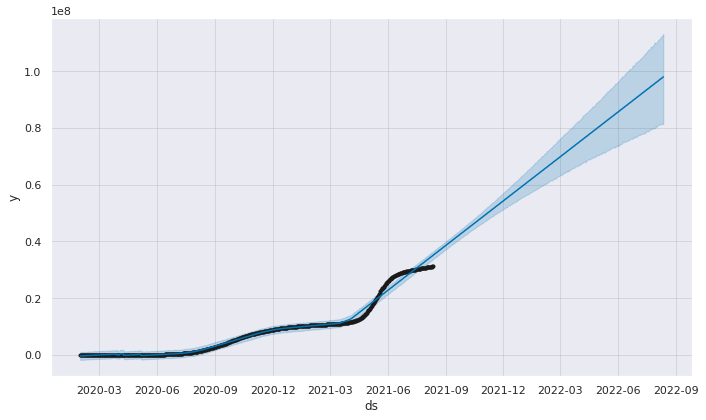

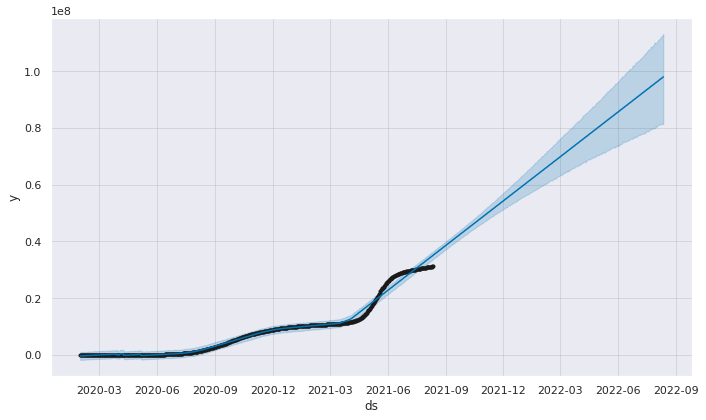

In [40]:
model.plot(pred)

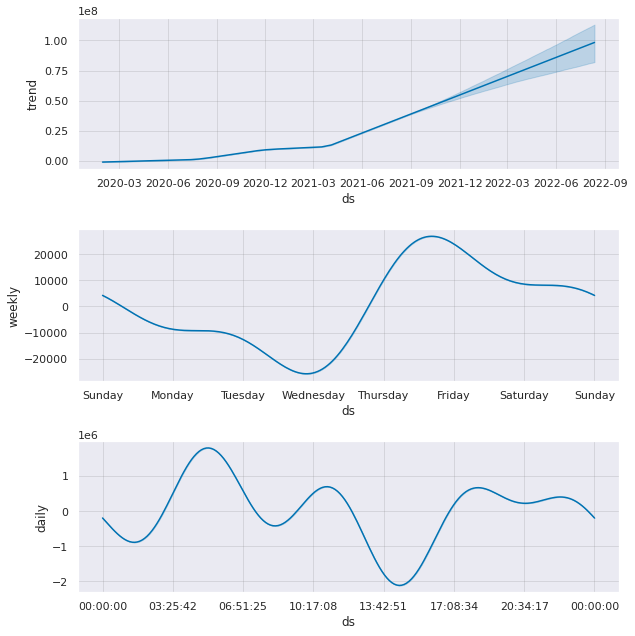

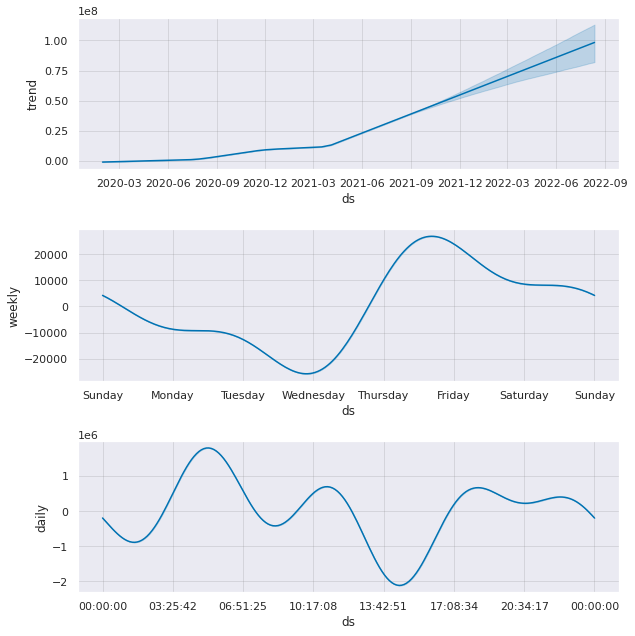

In [41]:
model.plot_components(pred)

In [42]:
vaccine.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [43]:
vaccine.dtypes

Updated On                              object
State                                   object
Total Doses Administered               float64
Sessions                               float64
 Sites                                 float64
First Dose Administered                float64
Second Dose Administered               float64
Male (Doses Administered)              float64
Female (Doses Administered)            float64
Transgender (Doses Administered)       float64
 Covaxin (Doses Administered)          float64
CoviShield (Doses Administered)        float64
Sputnik V (Doses Administered)         float64
AEFI                                   float64
18-44 Years (Doses Administered)       float64
45-60 Years (Doses Administered)       float64
60+ Years (Doses Administered)         float64
18-44 Years(Individuals Vaccinated)    float64
45-60 Years(Individuals Vaccinated)    float64
60+ Years(Individuals Vaccinated)      float64
Male(Individuals Vaccinated)           float64
Female(Indivi

In [44]:
vaccine['Updated On'] = pd.to_datetime(vaccine['Updated On'])

In [45]:
vaccine.dtypes

Updated On                             datetime64[ns]
State                                          object
Total Doses Administered                      float64
Sessions                                      float64
 Sites                                        float64
First Dose Administered                       float64
Second Dose Administered                      float64
Male (Doses Administered)                     float64
Female (Doses Administered)                   float64
Transgender (Doses Administered)              float64
 Covaxin (Doses Administered)                 float64
CoviShield (Doses Administered)               float64
Sputnik V (Doses Administered)                float64
AEFI                                          float64
18-44 Years (Doses Administered)              float64
45-60 Years (Doses Administered)              float64
60+ Years (Doses Administered)                float64
18-44 Years(Individuals Vaccinated)           float64
45-60 Years(Individuals Vacc

In [46]:
vaccine['Total Individuals Vaccinated'] = vaccine['Total Individuals Vaccinated'].fillna(0)
vaccine['Male(Individuals Vaccinated)'] = vaccine['Male(Individuals Vaccinated)'].fillna(0)
vaccine['Female(Individuals Vaccinated)'] = vaccine['Female(Individuals Vaccinated)'].fillna(0)
vaccine['Transgender(Individuals Vaccinated)'] = vaccine['Transgender(Individuals Vaccinated)'].fillna(0)

In [47]:
fig = px.treemap(vaccine,path=['Updated On','Male(Individuals Vaccinated)'],values='Total Individuals Vaccinated')
fig.show()

In [48]:
fig = px.treemap(vaccine,path=['Updated On','Female(Individuals Vaccinated)'],values = 'Total Individuals Vaccinated')
fig.show()

In [49]:
fig = px.treemap(vaccine,path=['Updated On','Female(Individuals Vaccinated)'],values='Total Individuals Vaccinated')
fig.show()

In [50]:
vaccine.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,2021-01-21,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,2021-01-22,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,2021-01-23,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,2021-01-24,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,2021-01-25,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


<AxesSubplot:xlabel='Updated On', ylabel='First Dose Administered'>

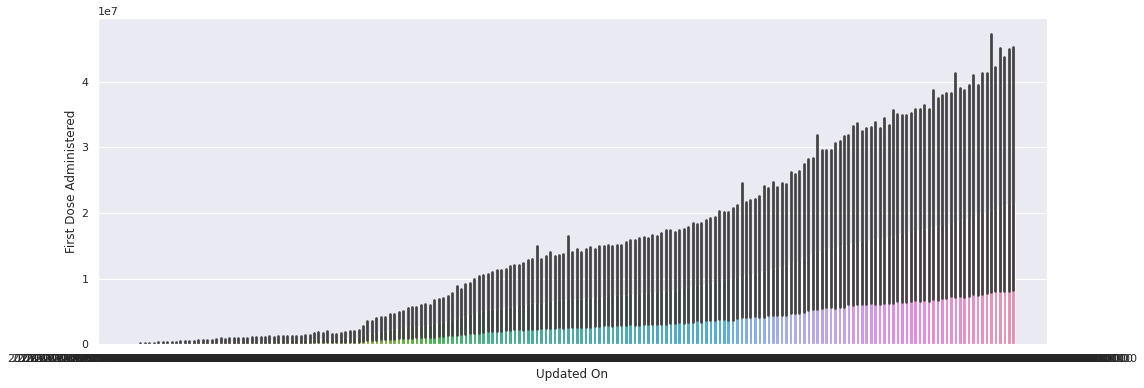

In [51]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='Updated On',y='First Dose Administered',data=vaccine)

<AxesSubplot:xlabel='Updated On', ylabel='Total Doses Administered'>

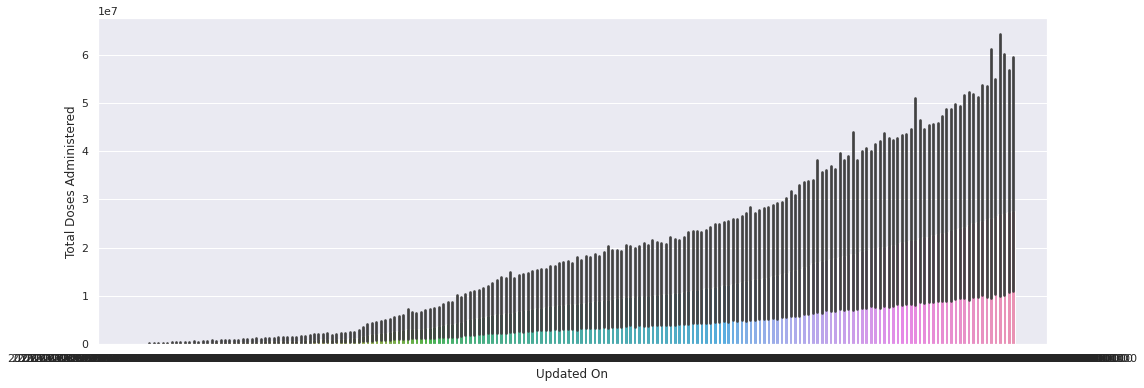

In [52]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='Updated On',y='Total Doses Administered',data=vaccine)

<AxesSubplot:xlabel='Updated On', ylabel='Sessions'>

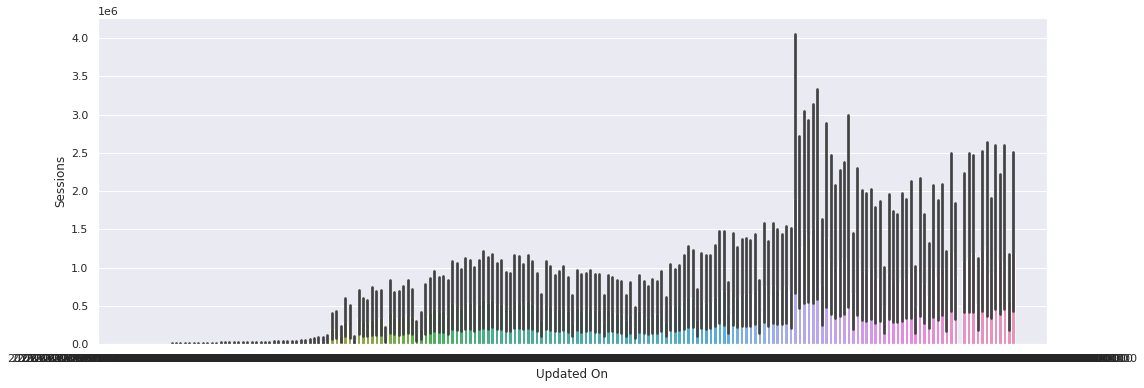

In [53]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='Updated On',y='Sessions',data=vaccine)

In [54]:
vaccine.head(5)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [55]:
testing['Negative'] = pd.to_numeric(testing['Negative'].str.replace(",", ""), errors='coerce')

In [56]:
testing['Date'] = pd.to_datetime(testing['Date'])

In [57]:
testing.dtypes

Date            datetime64[ns]
State                   object
TotalSamples           float64
Negative               float64
Positive               float64
dtype: object

In [58]:
testing_new = testing.groupby(['State'])['Positive','Negative'].sum().reset_index()

In [59]:
testing_new

,State,Positive,Negative
0,Andaman and Nicobar Islands,1763591.0,1.210000e+03
1,Andhra Pradesh,3859260.0,3.991600e+09
2,Arunachal Pradesh,51245.0,1.156258e+08
3,Assam,2065991.0,2.163110e+06
4,Bihar,1859345.0,2.299000e+03
5,Chandigarh,59195.0,8.860078e+07
6,Chhattisgarh,467857.0,2.701459e+06
7,Dadra and Nagar Haveli and Daman and Diu,169010.0,6.047477e+06
8,Delhi,6848173.0,4.431050e+05
9,Goa,266181.0,1.156310e+05


<AxesSubplot:xlabel='Positive', ylabel='State'>

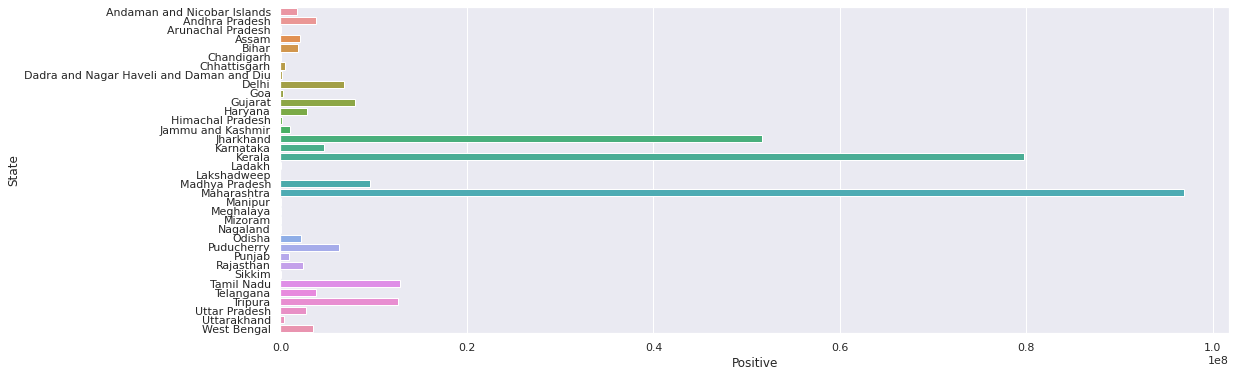

In [60]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='Positive',y='State',data=testing_new)

<AxesSubplot:xlabel='Negative', ylabel='State'>

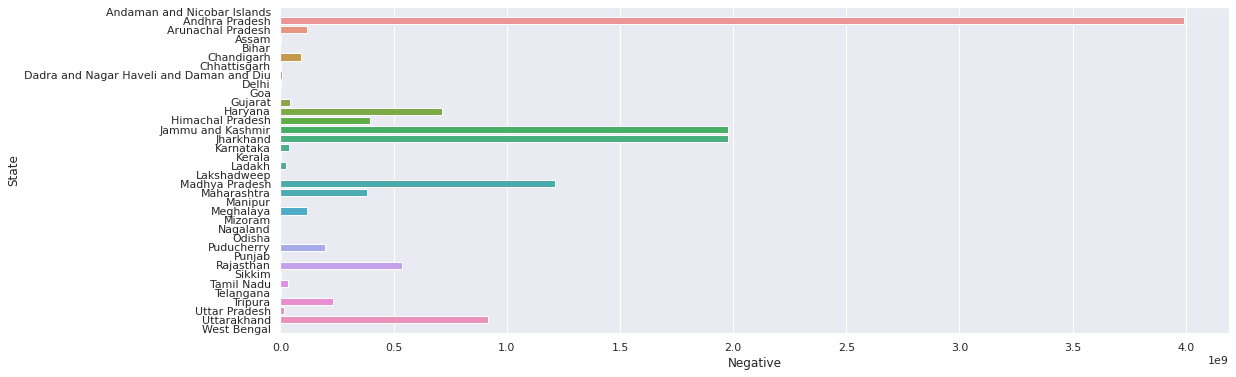

In [61]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='Negative',y='State',data=testing_new)

In [62]:
testing_next = testing.groupby(['Date'])['Positive','Negative'].sum().reset_index()

In [63]:
testing_next

,Date,Positive,Negative
0,2020-04-01,302.0,7824.0
1,2020-04-02,510.0,11386.0
2,2020-04-03,898.0,17242.0
3,2020-04-04,306.0,8586.0
4,2020-04-05,1201.0,39411.0
...,...,...,...
492,2021-08-06,79774.0,59437827.0
493,2021-08-07,79945.0,59686812.0
494,2021-08-08,80131.0,59918656.0
495,2021-08-09,80208.0,60121883.0


<AxesSubplot:xlabel='Positive', ylabel='Date'>

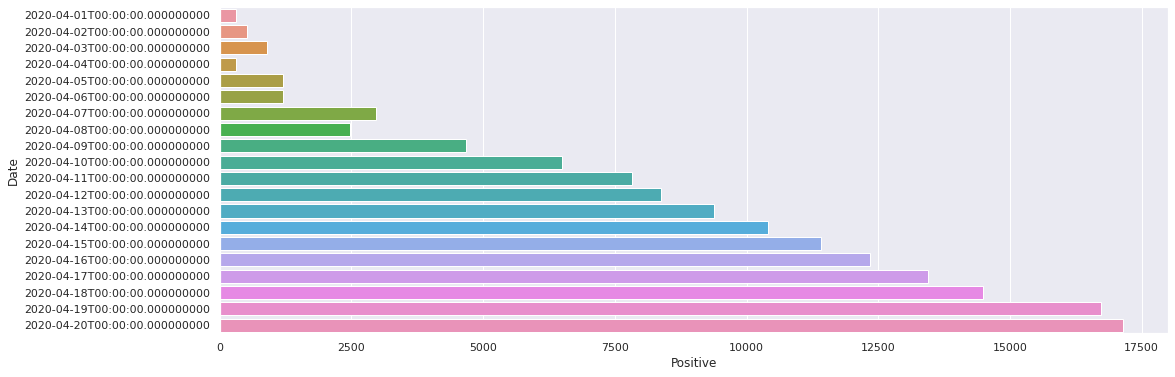

In [64]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='Positive',y='Date',data=testing_next[:20])

<AxesSubplot:xlabel='Negative', ylabel='Date'>

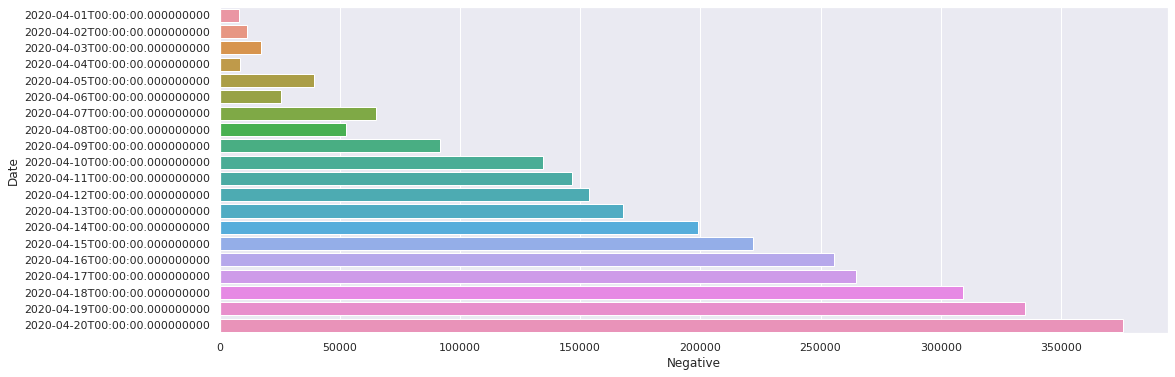

In [65]:
sns.set(rc={'figure.figsize':(17,6)})
sns.barplot(x='Negative',y='Date',data=testing_next[:20])